In [1]:
# Author: Mitchell D. Lobbes

# Standard imports
import lightgbm as lgb
import pandas as pd
import numpy as np

# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

# Model imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Imputation imports
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
# Set Viewing Options
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
data = pd.read_csv("../../../Data/Model/Model_data_cleaned.csv")
data

rental_price     GLA  n_res_benefits  population  d_school  d_transfer  d_mainstreet  n_business  n_earners  d_supermarket  avg_income  %_single_family_homes  k20_high_income  households_with_children  single_households  household_size  k40_low_income    WOZ  n_owner_occupied  urbanity_score  supermarket_1km  k0_k15  k15_k25  k25_k45  k45_k65  k65+
0      145.000000   800.0           960.0        5710       0.3         1.8           1.6       965.0     4500.0            0.4        26.9                   22.0             15.5                       245               3385             1.3            51.8  253.0              24.0             1.0              8.3     255     2155     1830      840   620
1      113.000000  1000.0           390.0        2160       0.2         1.0           0.6       220.0     1700.0            0.4        26.5                    2.0             16.2                       165               1050             1.4            43.0  229.0              33.0             1.0              3.0     155      525      940      345   190
2      145.428980  1049.0           640.0        5975       0.3         2.9           1.2       550.0     5000.0            0.5        24.9                   14.0             15.6                       385               2855             1.4            50.7  226.0              30.0             1.0              4.7     455     2275     2110      745   380
3      195.647807  2280.0           640.0        5975       0.3         2.9           1.2       550.0     5000.0            0.5        24.9                   14.0             15.6                       385               2855             1.4            50.7  226.0              30.0             1.0              4.7     455     2275     2110      745   380
4      105.000000  1400.0             0.0         650       NaN         NaN           NaN       200.0        NaN            0.4         NaN                    0.0              NaN                        70                175             1.8             NaN  321.0              47.0             2.0              NaN      70       60      265      165    90
..            ...     ...             ...         ...       ...         ...           ...         ...        ...            ...         ...                    ...              ...                       ...                ...             ...             ...    ...               ...             ...              ...     ...      ...      ...      ...   ...
296    127.000000  1400.0             0.0        4410       NaN         NaN           NaN       395.0        NaN            0.6         NaN                   66.0              NaN                       820                435             2.6             NaN  334.0              66.0             3.0              NaN    1095      425     1395     1025   465
297    120.000000   833.0           780.0        3000       0.9        16.3           0.8       210.0     2400.0            0.4        25.9                   95.0             15.2                       485                400             2.2            38.9  239.0              71.0             4.0              1.0     510      315      740      820   620
298    170.000000  2045.0          1280.0        7095       0.7        16.2           1.6       550.0     5600.0            0.8        29.6                   77.0             22.4                      1215                860             2.4            33.2  299.0              72.0             3.0              0.8    1295      795     1965     2185   860
299    123.000000  1674.0             0.0        1875       NaN         NaN           NaN       270.0        NaN            0.5         NaN                   43.0              NaN                       150                560             1.7             NaN  238.0              47.0             3.0              NaN     150      170      435      445   685
300    163.000000  1874.0          1220.0        3950       0.3        25.3           1.3

In [4]:
X = data.drop(columns=["rental_price"], axis=1).copy()
y = data["rental_price"].copy()

imputer = IterativeImputer(random_state=42)
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Start LightGBM

In [5]:
def evaluate(model, test_features, test_labels):

    # calculate RMSE
    mse = mean_squared_error(test_labels, model.predict(test_features))
    rmse = np.sqrt(mse)
    print('RMSE: %.3f' % rmse)
    
    # calculate R^2
    r2 = r2_score(test_labels, model.predict(test_features))
    print('R^2: %.3f' % r2)

    # calculate mae
    mae = np.mean(abs(model.predict(test_features) - test_labels))
    print('MAE: %.3f' % mae)

    # calculate mape
    mape = np.mean(abs(model.predict(test_features) - test_labels) / test_labels)
    print('MAPE: %.3f' % mape)

    # calculate accuracy
    accuracy = 1 - mape
    print('Accuracy: %.3f' % accuracy)


In [6]:
model = lgb.LGBMRegressor(random_state=42)

# Train model
model.fit(X_train, y_train)
evaluate(model, X_test, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1517
[LightGBM] [Info] Number of data points in the train set: 270, number of used features: 25
[LightGBM] [Info] Start training from score 164.396221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

# RandomizedSearchCV

In [7]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
 'n_estimators': [10,20, 50,100,200,300,400,500],
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "reg_alpha": [0, 0.5, 1, 5],
 "reg_lambda": [0, 0.5, 1, 5],
 "num_leaves": [10,20,30,40,50,100]
}
pprint(random_grid)

{'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
 'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'n_estimators': [10, 20, 50, 100, 200, 300, 400, 500],
 'num_leaves': [10, 20, 30, 40, 50, 100],
 'reg_alpha': [0, 0.5, 1, 5],
 'reg_lambda': [0, 0.5, 1, 5]}


In [8]:
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_random = RandomizedSearchCV(estimator = lgb_model, param_distributions = random_grid, n_iter = 30, cv = 10, verbose=2, random_state=42, n_jobs = -1)
lgb_random.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1397
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Number of data points in the train set: 243, number of used features: 25
[LightGBM] [Info] Total Bins 1410
[LightGBM] [Info] Start training from score 164.287270
[LightGBM] [Info] Number of data points in the train set: 243, number of used features: 25
[LightGBM] [Info] Start training from score 164.310125
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1403
[LightGBM] [Info] Number of data points in the train set: 243, number of used features: 25
[LightGBM] [Warning] No furth

RandomizedSearchCV(cv=10, estimator=LGBMRegressor(random_state=42), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [10, 20, 50, 100, 200,
                                                         300, 400, 500],
                                        'num_leaves': [10, 20, 30, 40, 50, 100],
                                        'reg_alpha': [0, 0.5, 1, 5],
                                        'reg_lambda': [0, 0.5, 1, 5]},
                   random_state=42, verbose=2)

In [9]:
model = lgb.LGBMRegressor(**lgb_random.best_params_, random_state=42)
model.fit(X_train, y_train)
evaluate(model, X_test, y_test)
print(lgb_random.best_params_)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1517
[LightGBM] [Info] Number of data points in the train set: 270, number of used features: 25
[LightGBM] [Info] Start training from score 164.396221
RMSE: 33.563
R^2: -0.067
MAE: 23.419
MAPE: 0.156
Accuracy: 0.844
{'reg_lambda': 5, 'reg_alpha': 0.5, 'num_leaves': 10, 'n_estimators': 20, 'min_child_weight': 3, 'max_depth': 12, 'learning_rate': 0.1, 'colsample_bytree': 0.4}


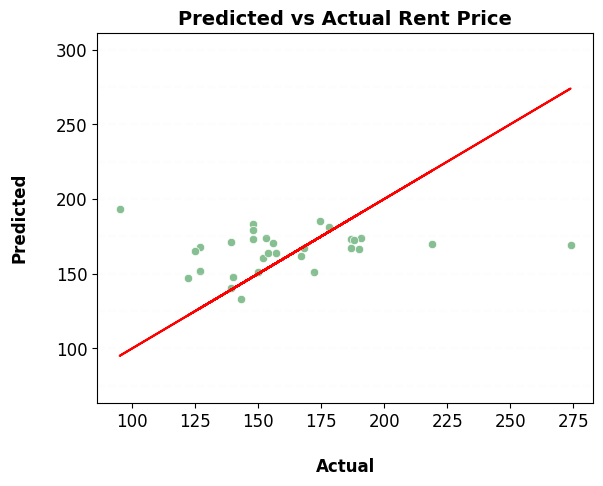

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import StrMethodFormatter

ax = sns.scatterplot(x=y_test, y=model.predict(X_test), color = '#86bf91')

ax.plot(y_test, y_test, color="red")

# Remove title
ax.set_title("Predicted vs Actual Rent Price", weight='bold', size=14)

# Set x-axis label
ax.set_xlabel("Actual", labelpad=20, weight='bold', size=12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)


# Set y-axis label
ax.set_ylabel("Predicted", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

#set background to white
ax.set_facecolor('white')

# set bottom spin to black thin line
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(0.8)

# Draw horizontal axis lines behind bars
vals = ax.get_yticks()
for tick in vals:
        
        ax.axhline(y=tick, linestyle='dashed', alpha=0.1, color='#eeeeee', zorder=1)


# XAI with SHAP

In [11]:
import seaborn as sns
import shap

shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [12]:
# create dataframe with 3 columns: y_pred, y_test, and absolute error
df = pd.DataFrame({'y_pred': model.predict(X_test), 'y_test': y_test, 'abs_error': abs(model.predict(X_test) - y_test)})

# reset index
df.reset_index(inplace=True, drop=True)

# sort dataframe by absolute error
df.sort_values(by=['abs_error'], ascending=False, inplace=True)

df

y_pred      y_test   abs_error
18  168.890059  274.000000  105.109941
29  193.523666   95.000000   98.523666
11  169.967331  219.000000   49.032669
2   167.995520  127.000000   40.995520
6   164.966704  125.000000   39.966704
17  183.510010  148.000000   35.510010
10  171.034504  139.000000   32.034504
24  179.223897  148.000000   31.223897
28  173.451043  148.000000   25.451043
25  147.384846  122.000000   25.384846
13  151.894627  127.000000   24.894627
26  166.379589  190.000000   23.620411
12  151.140884  172.000000   20.859116
9   173.788166  153.000000   20.788166
20  167.336503  186.838214   19.501710
8   173.711495  191.000000   17.288505
30  172.835415  188.000000   15.164585
27  170.687105  156.000000   14.687105
3   173.472558  187.000000   13.527442
16  185.425753  174.638528   10.787224
19  132.957310  143.000000   10.042690
5   163.587614  154.000000    9.587614
0   160.408572  152.000000    8.408572
4   147.889586  140.000000    7.889586
23  163.961818  157.000000    6.961818
21  163.771361  157.000000    6.771361
7   162.160329  167.000000    4.839671
14  181.591466  178.000000    3.591466
22  140.340254  139.000000    1.340254
15  151.140884  150.000000    1.140884
1   166.941889  168.000000    1.058111

In [13]:
#explainer = shap.TreeExplainer(regressor_rf)
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)

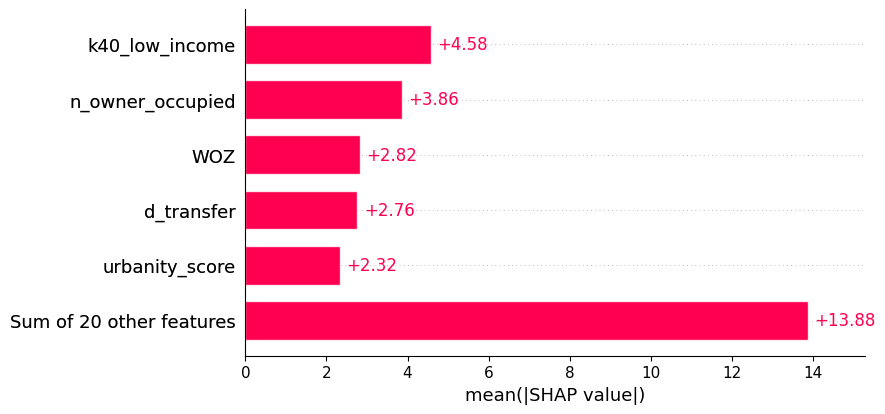

In [14]:
shap.plots.bar(shap_values, max_display=6)

In [15]:
# shap.plots.force(shap_values[1])

# Force plot of prediction with the highest error
shap.plots.force(shap_values[df.index[0]])

In [16]:
# Force plot of prediction with the second highest error
shap.plots.force(shap_values[df.index[1]])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


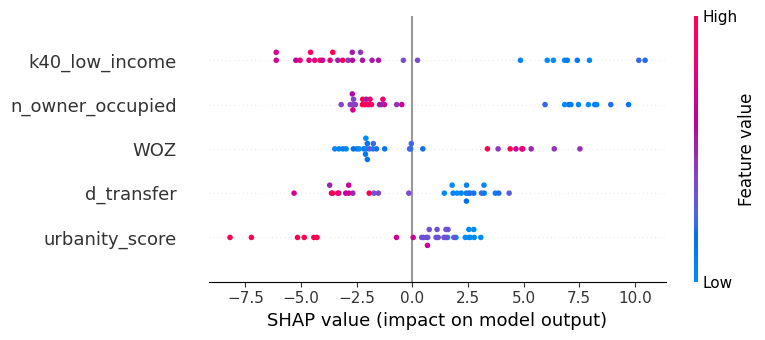

In [17]:
shap.summary_plot(shap_values, X_test, max_display=5)